<a href="https://colab.research.google.com/github/subhashsomarouthu/Yes_Bank_Stock_Closing_Price_Prediction/blob/main/Yes_Bank_Stock_Closing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/subhashsomarouthu/Yes_Bank_Stock_Closing_Price_Prediction

# **Problem Statement**


Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

**Business Objective.**

The ultimate business objective is to leverage the regression model to provide accurate predictions of the closing price of Yes Bank stock, enabling stakeholders to make well-informed investment decisions, manage risks effectively, optimize portfolios, Early warning systems to alert any fraud cases like Rana Kapoor and align investment strategies with financial goals.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np                                                           #numerical computations
import pandas as pd                                                          #to load the data


import matplotlib.pyplot as plt  
%matplotlib inline

import seaborn as sns                                                        # for visualization
 

from sklearn.preprocessing import (MinMaxScaler,StandardScaler)              #scaling the data 
from sklearn.model_selection import train_test_split                        # split train and test data

from sklearn.model_selection import GridSearchCV 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error     

from sklearn.linear_model import (Lasso, Ridge,ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [3]:
# Load Dataset

#from google.colab import files
#file=files.upload()


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
dataset = pd.read_csv('/content/drive/MyDrive/Datasets/Data_Science_almabetter/capstone_project_module1/data_YesBank_StockPrices.csv')

In [6]:
#import io
#dataset = pd.read_csv(io.BytesIO(file['data_YesBank_StockPrices.csv']))


### Dataset First View

In [7]:
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
dataset

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [9]:
dataset.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [10]:
# Dataset Rows & Columns count
dataset.shape



(185, 5)

In [11]:
dataset.size

925

### Dataset Information

In [12]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [15]:
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

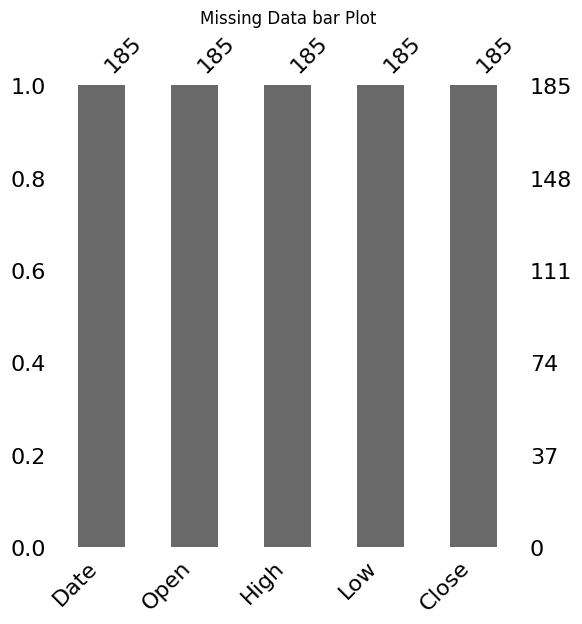

In [16]:
# Visualizing the missing values
import missingno as msno


msno.bar(dataset,figsize=(6,6))


plt.title('Missing Data bar Plot')
plt.show()



### What did you know about your dataset?

There are 5 columns and 185 records in the given dataset.It includes monthly stock prices from July 2005 to November 2020. Among the 5 columns, 4 are independent variables (Data, open,high,low) and dependent variable(close). There are no duplicate values, null values or missing values in the data. All the independent variables are of float data type except date which is object and need to be converted to datetime.

## ***2. Understanding Your Variables***

In [17]:
# Dataset Columns
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [18]:
# Dataset Describe
dataset.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [19]:
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 

Date - Date of the record. It has monthly dates from July 2005 to November 
2020. data type is object need to change into datetime

Open- opening price of the share/stock (Numerical)

High - Highest price of the share for that day (Numerical)

Low - Lowest Price of the share for that day (Numerical)

Close - Closing price of the share for that day (Numerical)


### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print('unique values in ',i, 'are', dataset[i].nunique())


unique values in  Date are 185
unique values in  Open are 183
unique values in  High are 184
unique values in  Low are 183
unique values in  Close are 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
dataset_copy= dataset.copy()

In [22]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [23]:
dataset_copy.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [24]:
len(dataset_copy[dataset_copy.duplicated()])

0

In [25]:
#converting datatype of Date from string to Datetime 

from datetime import datetime

dataset_copy['Date']=pd.to_datetime(dataset_copy['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [26]:
dataset_copy.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [27]:
dataset_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [28]:
dataset_copy.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [29]:
col=dataset_copy.columns.to_list()
numerical_cols=col[1:]

In [30]:
numerical_cols

['Open', 'High', 'Low', 'Close']

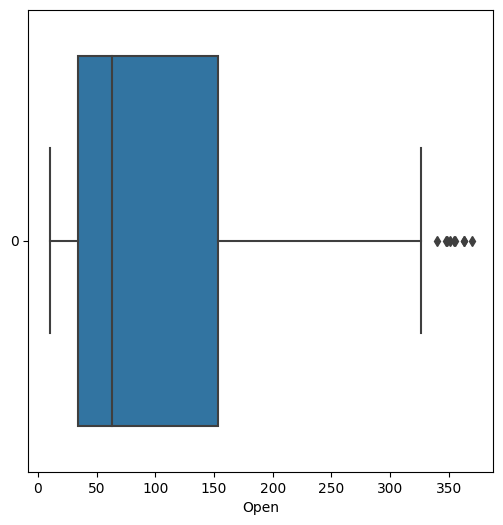

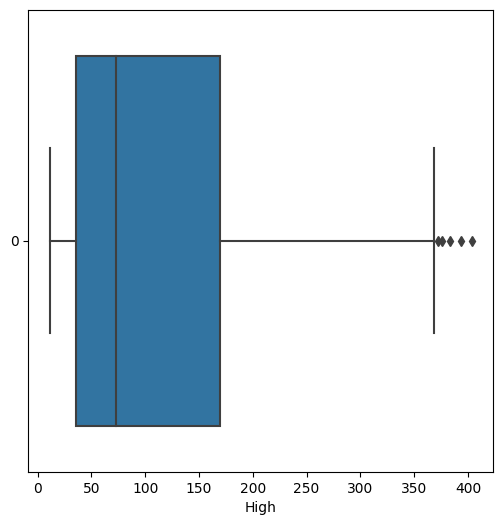

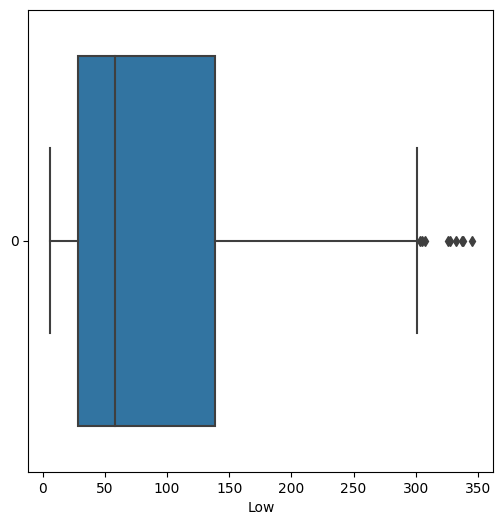

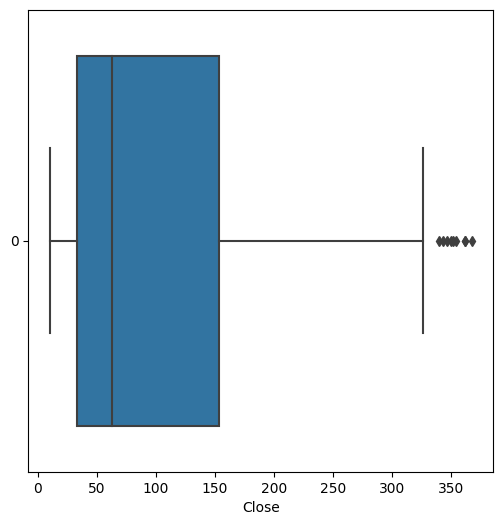

In [31]:
for column in numerical_cols:
  plt.figure(figsize=(6,6))
  sns.boxplot(dataset_copy[column],orient='h')
  plt.xlabel(column, fontsize=10)
  plt.show()

In [32]:
#setting the Date as index.
dataset_copy.set_index('Date', inplace=True)  

In [33]:
dataset_copy.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [34]:
# seperating the data
independent_variables = dataset_copy.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

I have changed datatype of Date variable to datetime. Remaining all variables are numerical. numerical variables are Open,High, Low and Close(dependent variable). There are no null values and duplicate values.  Data is clean and ready for vizualization. Mean is higher in numerical columns which indicate possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

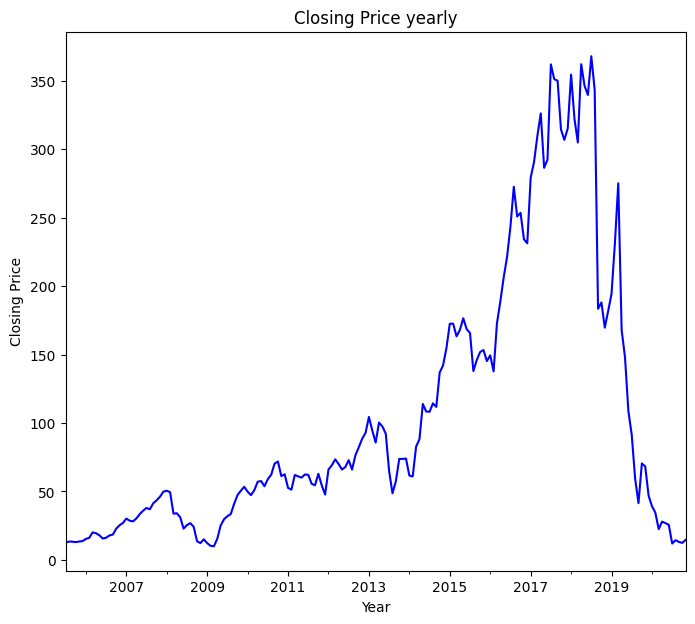

In [35]:
plt.figure(figsize=(8,7))
dataset_copy['Close'].plot(color = 'b')

plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price yearly')
plt.show()

##### 1. Why did you pick the specific chart?

To see how closing price in each year.

##### 2. What is/are the insight(s) found from the chart?

form seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2

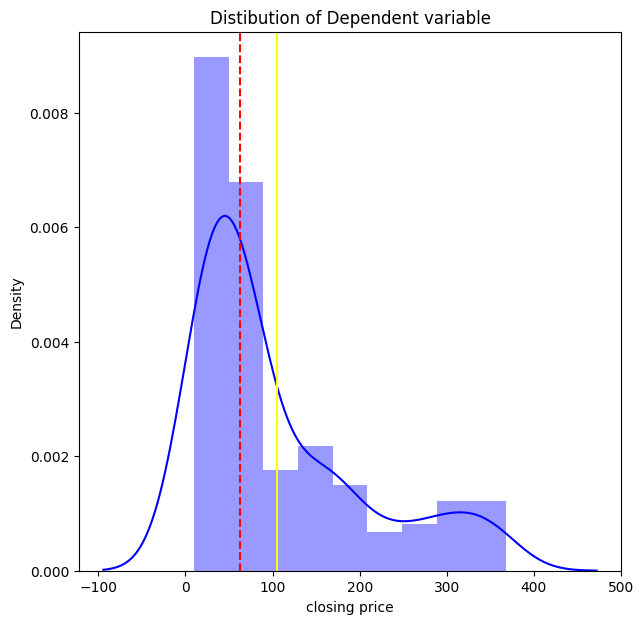

In [36]:
# Dependent variable 'Close'
#checking the distribution of the dependent variable
plt.figure(figsize=(7,7))
sns.distplot(dataset_copy['Close'],color="b")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(dataset_copy['Close'].mean(),color='yellow')                           
plt.axvline(dataset_copy['Close'].median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).we can apply transformation to bring it to normal distribution because our model works best when data is distributed normally.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3

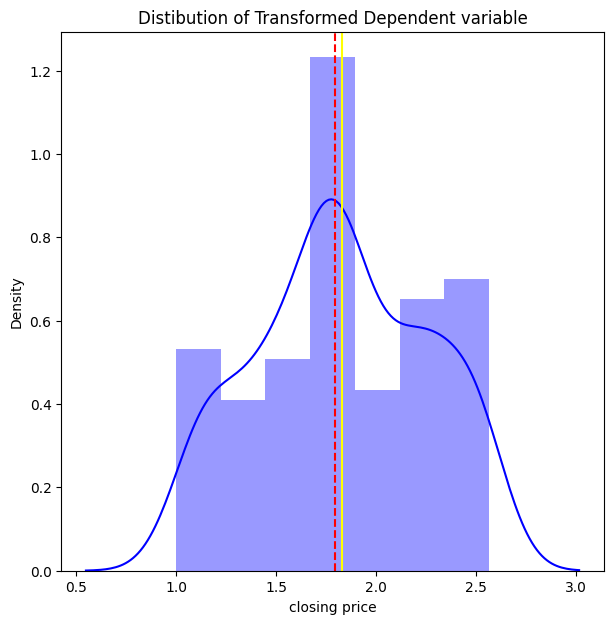

In [37]:
#applying log transformation
plt.figure(figsize=(7,7))
sns.distplot(np.log10(dataset_copy['Close']),color="b")
plt.title('Distibution of Transformed Dependent variable')
plt.xlabel('closing price')


plt.axvline(np.log10(dataset_copy['Close']).mean(),color='yellow') 
plt.axvline(np.log10(dataset_copy['Close']).median(),color='red',linestyle='dashed')
plt.show()

##### 1. Why did you pick the specific chart?

to see the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution.
mean and median are almost same 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4

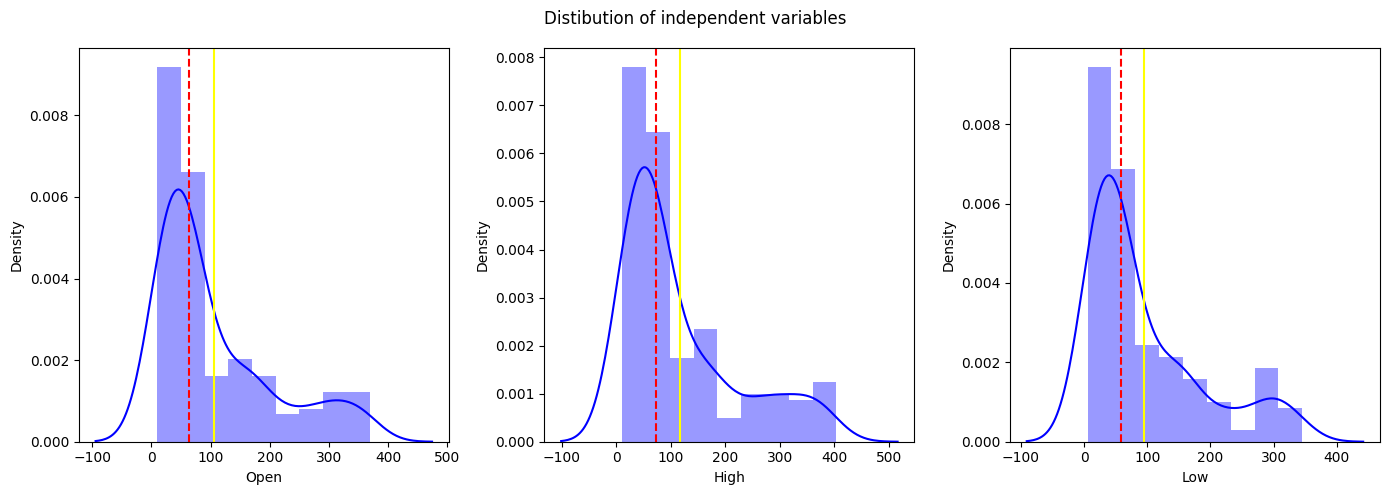

In [38]:

# Plotting the distributions of Independent features.
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(dataset_copy[col], color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(dataset_copy[col].mean(), color='yellow')
    plt.axvline(dataset_copy[col].median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5

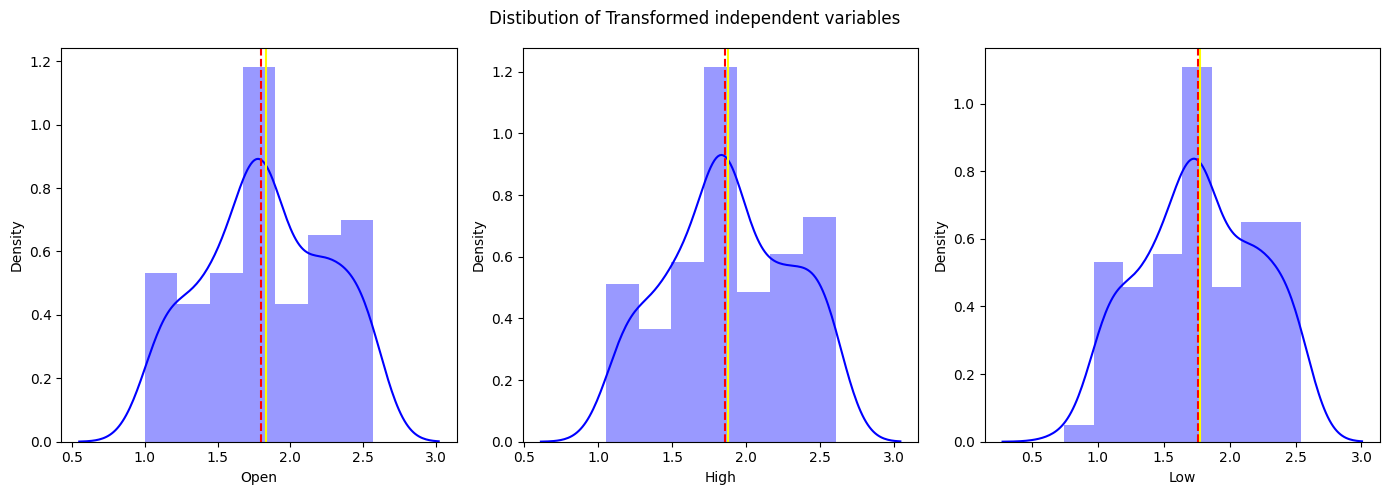

In [39]:
# Distribution of transformed independent variables
plt.figure(figsize=(14, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(np.log10(dataset_copy[col]), color='b')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(dataset_copy[col]).mean(), color='yellow')
    plt.axvline(np.log10(dataset_copy[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.0 MB/s eta 0:00:00


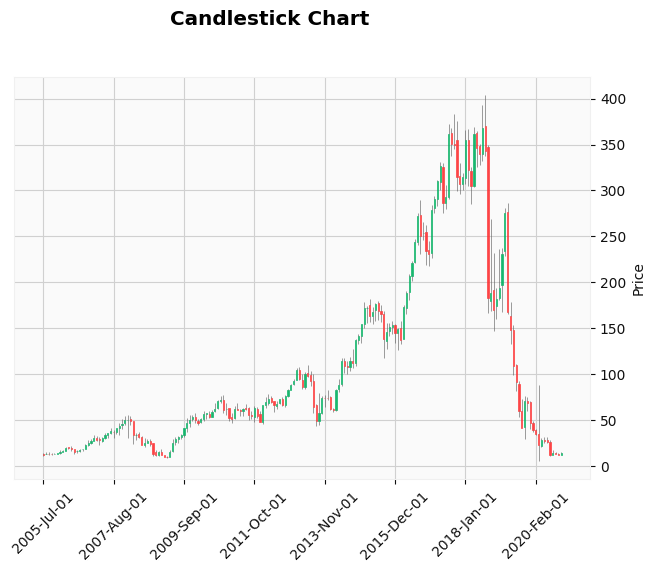

In [40]:
!pip install mplfinance

import mplfinance as mpf

df_candle = dataset_copy[['Open', 'High', 'Low', 'Close']]

mpf.plot(df_candle, type='candle', style='yahoo', title='Candlestick Chart')

##### 1. Why did you pick the specific chart?

candle sticks are most widely used finance world. with this chart I wnat to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

from the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 7

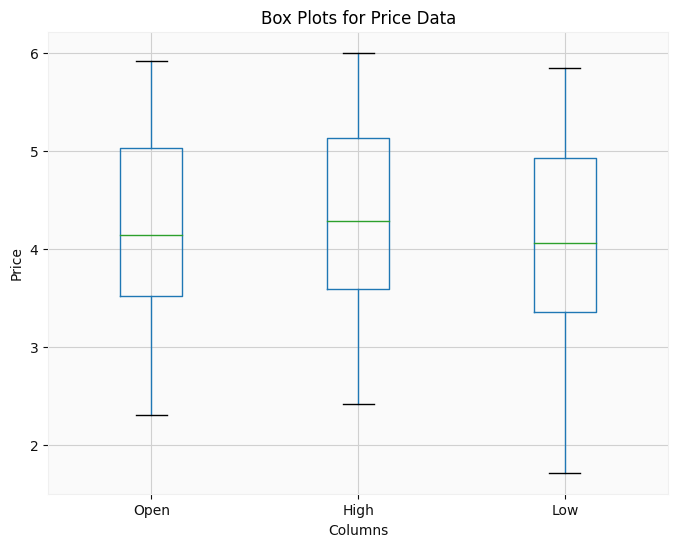

In [41]:
df_price = np.log(dataset_copy[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

##### 1. Why did you pick the specific chart?

TO see outliers exists or not in the independent variables.

##### 2. What is/are the insight(s) found from the chart?

After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

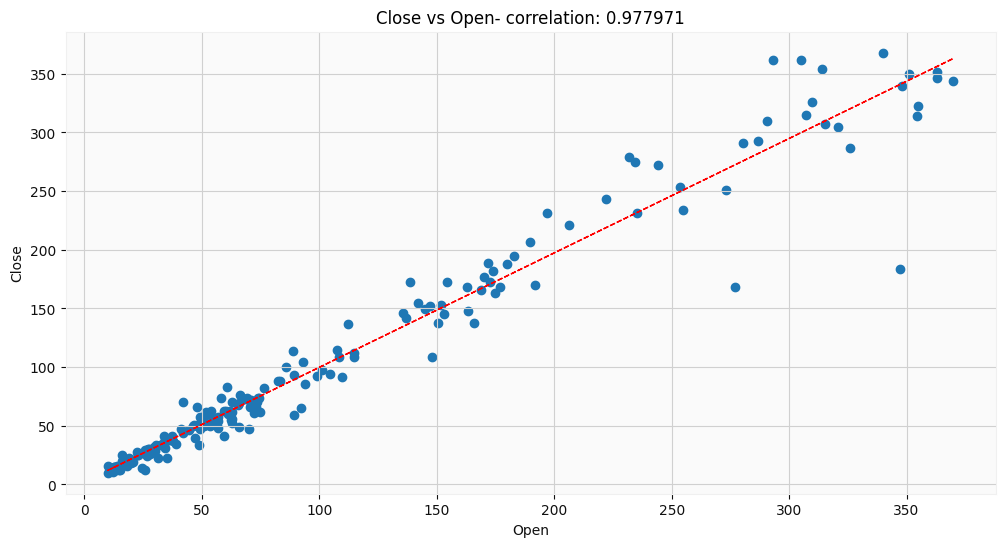

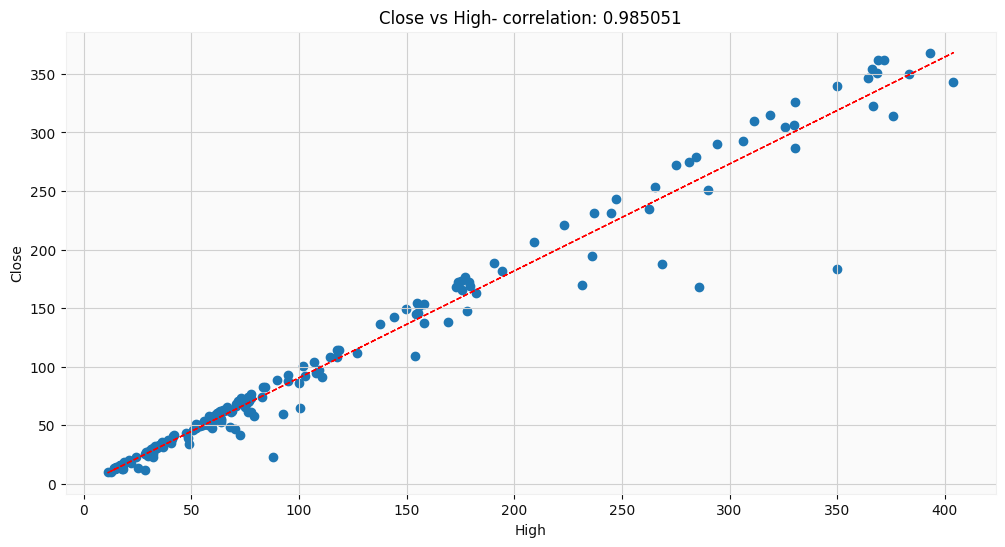

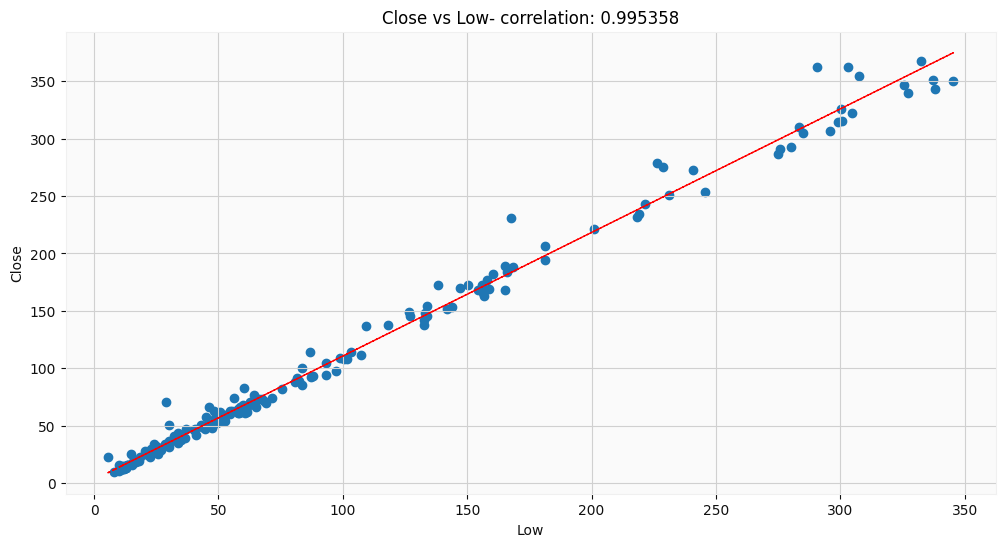

In [42]:
# Plotting the independent variables against dependent variable and checking the correlation between them.
for col in independent_variables:

  fig = plt.figure(figsize=(12, 6))
  ax = fig.gca()
  feature = dataset_copy[col]
  label = dataset_copy['Close']
  correlation = feature.corr(label)        # calculating the correlation between dependent variable and independent features.
  plt.scatter(x=feature, y=label)          # plotting dependent variables against independent features.  

 
  plt.xlabel(col)
  plt.ylabel('Close')
  ax.set_title('Close vs ' + col + '- correlation: ' + str(round((correlation),6)))

  z = np.polyfit(dataset_copy[col], dataset_copy['Close'], 1)                                
  y_ = np.poly1d(z)(dataset_copy[col])

  plt.plot(dataset_copy[col], y_, "r--", lw=1)

plt.show()


##### 1. Why did you pick the specific chart?

I want to plot correlation between independent variable and dependent variable. 

##### 2. What is/are the insight(s) found from the chart?

It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9

In [43]:
# Chart - 9 visualization code

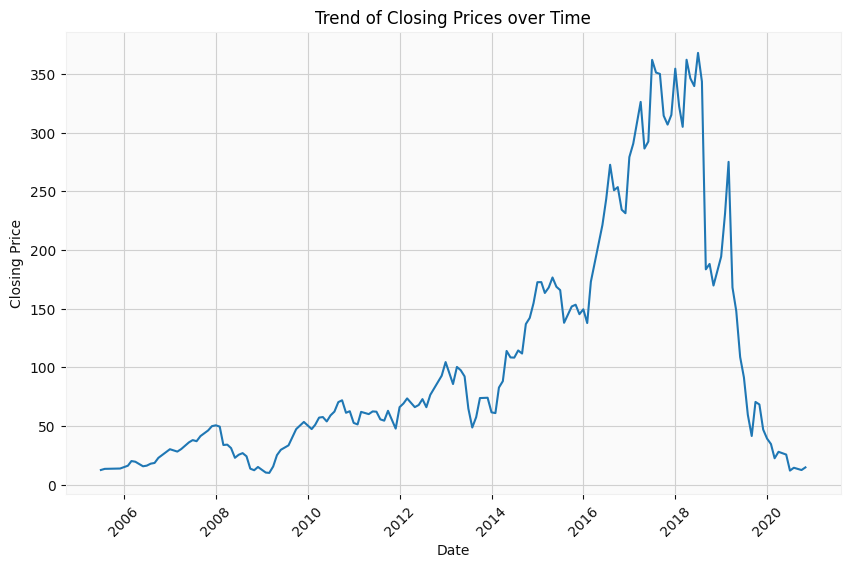

In [44]:


# Extract the date and closing price columns from the dataset
dates = dataset_copy.index
closing_prices = dataset_copy['Close']

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Trend of Closing Prices over Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [45]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [46]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [47]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [48]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

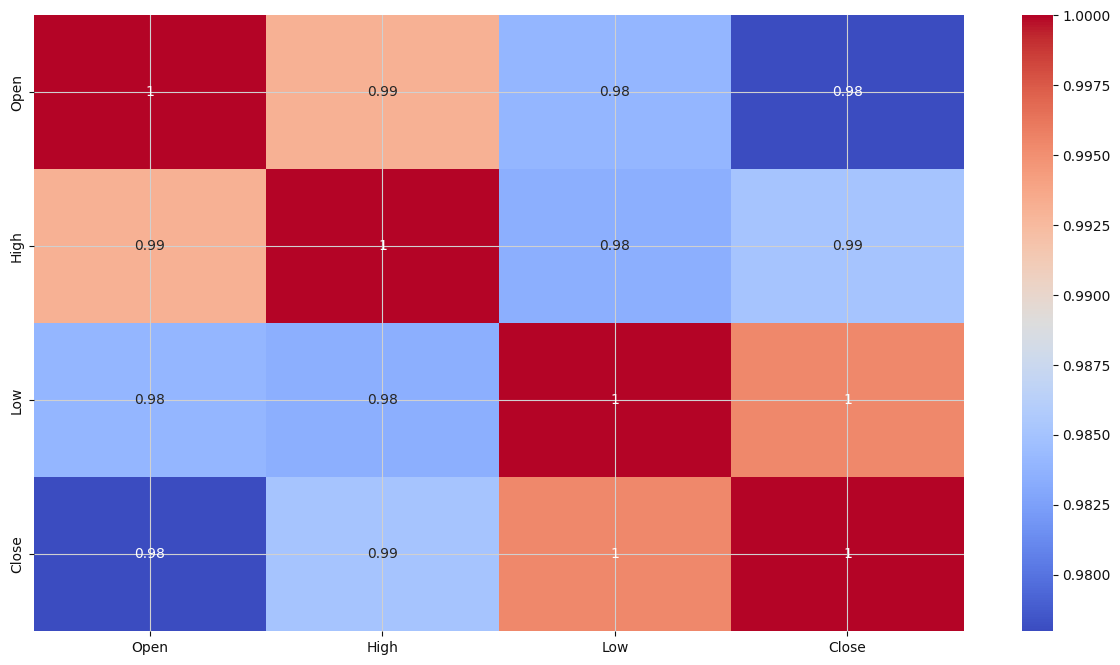

In [49]:
# Correlation Heatmap visualization code

plt.figure(figsize=(15,8))
correlation = dataset_copy.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. if that is the case, it is consider as abnormal like the fraud case in 2018.

#### Chart - 15 - Pair Plot 

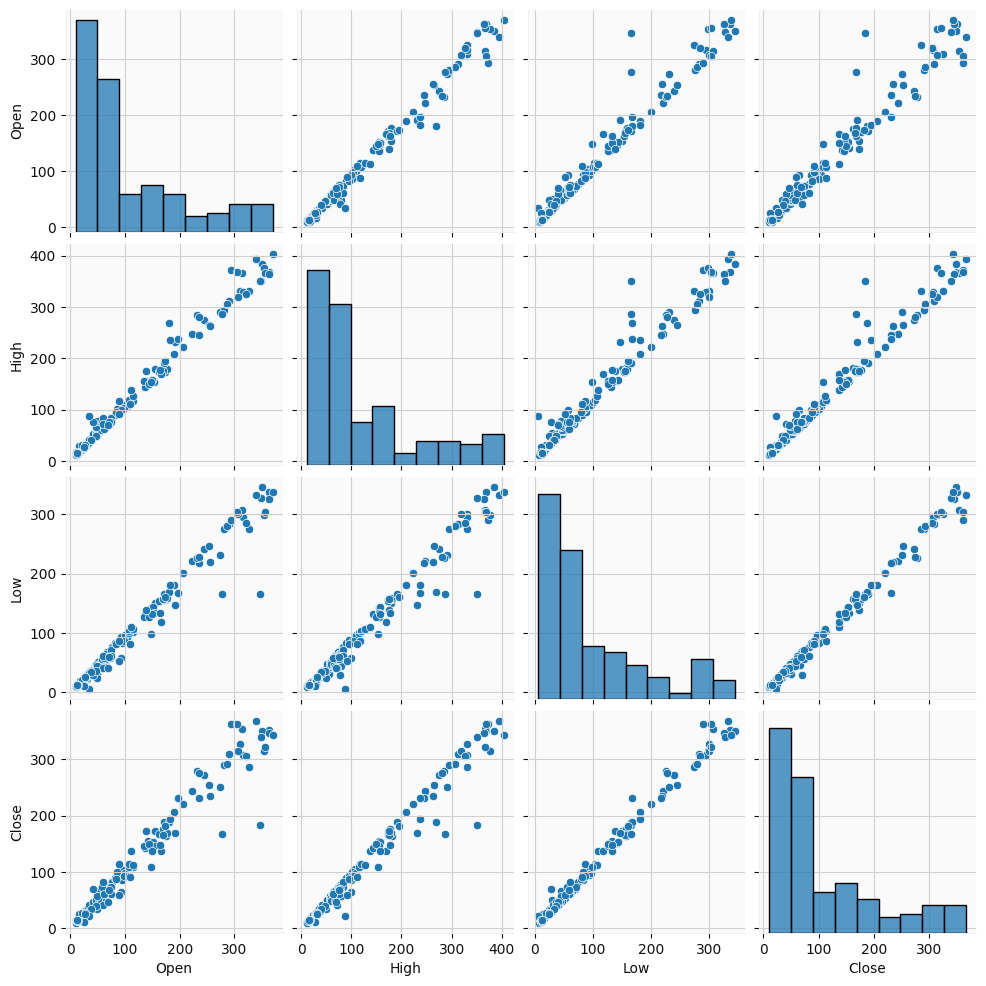

In [50]:
# Pair Plot visualization code

sns.pairplot(dataset_copy)

In [51]:
dataset_copy

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [52]:
ds1=dataset_copy.copy()

##### 1. Why did you pick the specific chart?

Seaborn Pairplot allows us to plot pairwise relationships between variables within a dataset. It gives us in single large picture. This is used essentially to get to know about our data and how our target variable is related with the rest of the variables

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement1: There is a significant difference in the mean closing prices between the first half (2005-2017) and the second half (2018-2020) of the dataset.

Statement2: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): There is no significant difference in the mean closing prices between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant difference in the mean closing prices between the first half and the second half of the dataset

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

Z test, as i my data has more than 30 records.

##### Why did you choose the specific statistical test?

my dataset has more than 30 records, and i can calculate mean and sd from it.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

#### 2. Perform an appropriate statistical test.

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: There is a significant difference in the mean closing prices between months with high opening prices and months with low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are equal to or lower than the mean closing prices in months with low opening prices.
Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are higher than the mean closing prices in months with low opening prices..

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

from scipy import stats

# Calculate the mean opening and closing prices for each month
ds1['Month'] = ds1.index.strftime('%Y-%m')
monthly_data = ds1.groupby('Month').agg({'Open': 'mean', 'Close': 'mean'})

# Define the threshold for high and low opening prices
threshold = monthly_data['Open'].median()

# Divide the data into groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate the sample statistics
mean_high = np.mean(high_opening_prices)
mean_low = np.mean(low_opening_prices)
std_high = np.std(high_opening_prices)
std_low = np.std(low_opening_prices)
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Calculate the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 1 - stats.norm.cdf(z_statistic)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")




Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [55]:
from scipy import stats

# Divide the data into groups based on opening prices
high_opening_prices = ds1[ds1['Open'] > threshold]['Close']
low_opening_prices = ds1[ds1['Open'] <= threshold]['Close']

# Perform independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")


Reject the null hypothesis. There is a significant difference in the mean closing prices.


##### Which statistical test have you done to obtain P-Value?

t test and z test.

##### Why did you choose the specific statistical test?

as my data is sample data and not normally distrubuted. there is skewenss involved.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [56]:
#There are no missing values in the dataset.

dataset_copy.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

### 2. Handling Outliers

In [57]:

#Transformation has taken care of outliers, so no need to treat outliers.

### 3. Categorical Encoding

In [58]:
# Encode your categorical columns
#There are no categorical variables in this dataset.

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. But, in the finance world, it is expected to have correlation between high, open and low price.

In [60]:
#Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor  

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)
     

In [61]:
calc_vif(ds1[[i for i in ds1.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [62]:
calc_vif(ds1[[i for i in ds1.describe().columns if i not in ['Close','Open']]])

,variables,VIF
0,High,62.598129
1,Low,62.598129


As I have only few features, and given the dataset of stock prices, multicollinearity is inevitable. But, I will consider to do feature generation or taking only single feature. I will try all the possibilities.

#### 2. Feature Selection

In [63]:
# Select your features wisely to avoid overfitting
independent_variables



['Open', 'High', 'Low']

In [64]:
dependent_variable

['Close']

##### Which all features you found important and why?

Open,High, close. I think they must be included because, on opening price is high and when low, there is a significant change in closing price.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,independent variables and dependent variables have skeweness. I have used log transformation as the skewness is small.

In [65]:
# Transform Your data

x = np.log10(dataset_copy[independent_variables]).values           

# Create the dependent variable data
y = np.log10(dataset_copy[dependent_variable]).values               
     

### 6. Data Scaling

In [78]:
# Scaling your data



scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

     

##### Which method have you used to scale you data and why?
I am going to use standard scaler.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

As I have only few features, dimensionality reduction is not necessary 

Answer Here.

Price Range: Instead of using Open, High, and Low separately, you can calculate the price range as the difference between the High and Low prices. This variable represents the volatility or fluctuation in the stock price for each period and can provide additional information to the model.

Average Price: Another approach is to calculate the average price as the average of the Open, High, and Low prices. This variable represents the overall price level for each period and can be useful in capturing the general trend or level of the stock price.

### 8. Data Splitting

In [79]:
# Split your data to train and test. Choose Splitting ratio wisely.

#splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)  
print(x_train.shape)
print(x_test.shape)

(148, 3)
(37, 3)


##### What data splitting ratio have you used and why? 

I have used 80 percent of the data for training the model and 20 % for testing the model. 

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

I do not think the data is imbalanced, however after 2018 the price went rapidly down beacause of the fraud case. that is taken care by transformation.


Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [70]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)



In [71]:
reg_with_transformation.score(x_train,y_train)

0.9960935846607548

In [72]:

# Predicting our test data.
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)


In [75]:

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

MSE : 7.379544345167679
RMSE : 2.716531675715871
R2 : 0.9989050815113929
Adjusted R2 :  0.9987787447627074


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

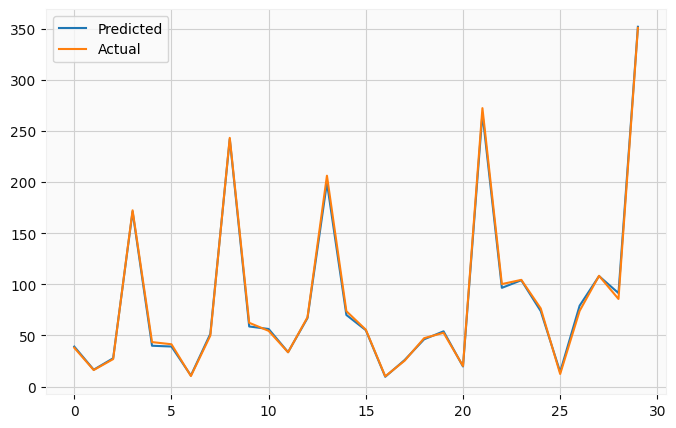

In [76]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(8,5))
plt.plot(10**(y_test_pred_with_transformation))
plt.plot(np.array(10**(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [76]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [79]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [80]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [81]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [82]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [83]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***